##  Análise de E-commerce — Olist Brazilian Dataset

## Sobre o Projecto
Análise exploratória completa do dataset público da Olist,
maior plataforma de e-commerce do Brasil, com mais de 100.000 pedidos
realizados entre 2016 e 2018.

## Objectivos
- Entender o comportamento de compra dos clientes
- Analisar a performance logística e de entregas
- Identificar categorias e produtos mais relevantes
- Segmentar clientes por valor e comportamento (RFM)
- Analisar padrões de pagamento

## Ferramentas Utilizadas
Python | Pandas | Matplotlib | Seaborn | Google Colab

## Dataset
[Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)




In [ ]:
!pip install plotly -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



Ambiente pronto! 


In [1]:
from google.colab import files

uploaded = files.upload()

Saving product_category_name_translation.csv to product_category_name_translation.csv
Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_customers_dataset.csv to olist_customers_dataset.csv


In [2]:
import os

for item in sorted(os.listdir('/content')):
    print(item)

.config
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_orders_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv
sample_data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar todos os datasets
orders = pd.read_csv('/content/olist_orders_dataset.csv')
customers = pd.read_csv('/content/olist_customers_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
category_translation = pd.read_csv('/content/product_category_name_translation.csv')

print("Todos os datasets carregados com sucesso! ")

Todos os datasets carregados com sucesso! 


In [4]:
# Visão geral do dataset principal
print(f"Total de pedidos: {orders.shape[0]:,}")
print(f"Total de clientes: {customers.shape[0]:,}")
print(f"Total de produtos: {products.shape[0]:,}")
print(f"Total de vendedores: {sellers.shape[0]:,}")
print("\nPrimeiras linhas dos pedidos:")
orders.head()

Total de pedidos: 99,441
Total de clientes: 99,441
Total de produtos: 32,951
Total de vendedores: 3,095

Primeiras linhas dos pedidos:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Verificar valores nulos em cada dataset
print("=== VALORES NULOS ===\n")

datasets = {
    'orders': orders,
    'customers': customers,
    'order_items': order_items,
    'payments': payments,
    'reviews': reviews,
    'products': products,
    'sellers': sellers
}

for nome, df in datasets.items():
    nulos = df.isnull().sum().sum()
    print(f"{nome}: {nulos} valores nulos")

=== VALORES NULOS ===

orders: 4908 valores nulos
customers: 0 valores nulos
order_items: 0 valores nulos
payments: 0 valores nulos
reviews: 145903 valores nulos
products: 2448 valores nulos
sellers: 0 valores nulos


##  Análise de Produtos e Receita
Identificamos as categorias com maior volume de vendas e maior
contribuição para a receita total da plataforma.

In [7]:
# Verificar os status dos pedidos
print("=== STATUS DOS PEDIDOS ===\n")
print(orders['order_status'].value_counts())

=== STATUS DOS PEDIDOS ===

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [8]:
# Focar apenas em pedidos entregues
orders_delivered = orders[orders['order_status'] == 'delivered'].copy()

# Converter colunas de data para o formato correto
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    orders_delivered[col] = pd.to_datetime(orders_delivered[col])

# Criar coluna de tempo de entrega em dias
orders_delivered['delivery_days'] = (
    orders_delivered['order_delivered_customer_date'] -
    orders_delivered['order_purchase_timestamp']
).dt.days

# Criar coluna indicando se entregou antes ou depois do prazo
orders_delivered['entregue_no_prazo'] = (
    orders_delivered['order_delivered_customer_date'] <=
    orders_delivered['order_estimated_delivery_date']
)

print(f"Pedidos entregues: {len(orders_delivered):,}")
print(f"\nTempo médio de entrega: {orders_delivered['delivery_days'].mean():.1f} dias")
print(f"\nEntregas no prazo: {orders_delivered['entregue_no_prazo'].sum():,} ({orders_delivered['entregue_no_prazo'].mean()*100:.1f}%)")
print(f"Entregas atrasadas: {(~orders_delivered['entregue_no_prazo']).sum():,} ({(~orders_delivered['entregue_no_prazo']).mean()*100:.1f}%)")

Pedidos entregues: 96,478

Tempo médio de entrega: 12.1 dias

Entregas no prazo: 88,644 (91.9%)
Entregas atrasadas: 7,834 (8.1%)


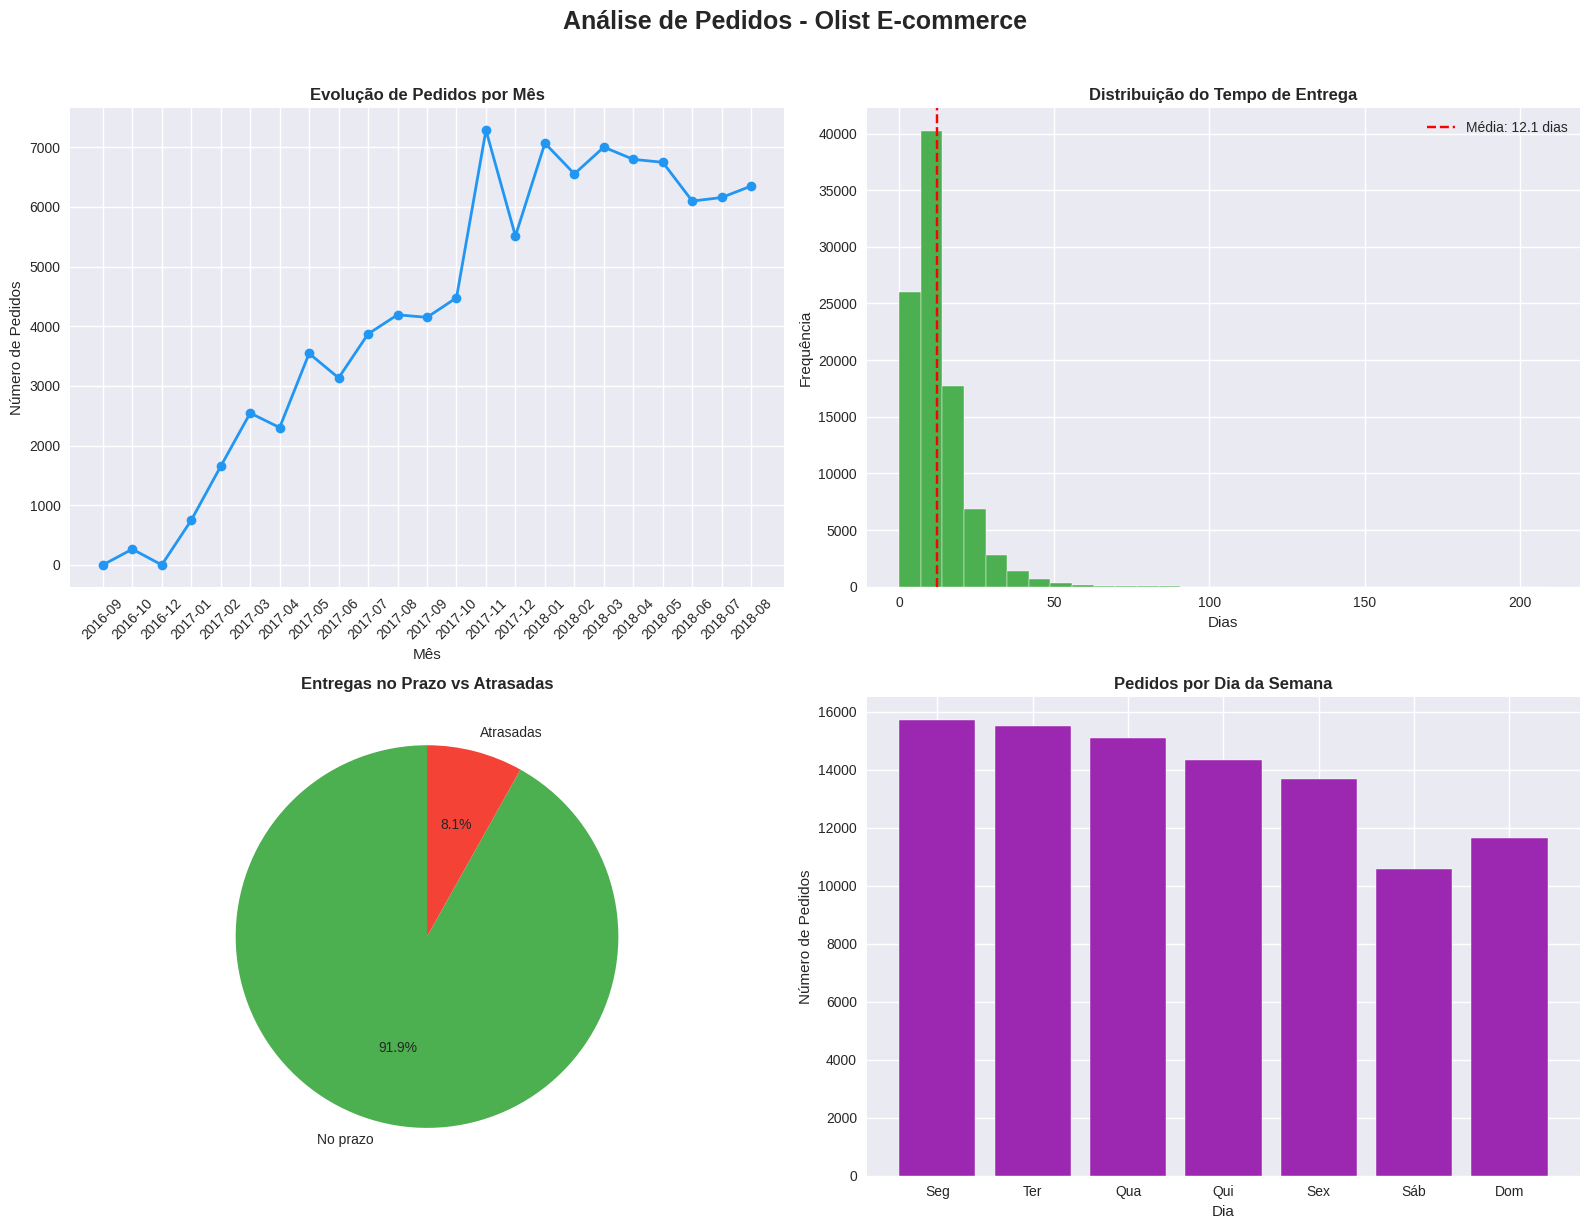

Gráfico salvo! ✅


In [9]:
# Configurar estilo dos gráficos
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise de Pedidos - Olist E-commerce', fontsize=18, fontweight='bold', y=1.02)

# 1. Pedidos por mês
orders_delivered['mes'] = orders_delivered['order_purchase_timestamp'].dt.to_period('M')
pedidos_por_mes = orders_delivered.groupby('mes').size()

axes[0,0].plot(pedidos_por_mes.index.astype(str), pedidos_por_mes.values,
               marker='o', color='#2196F3', linewidth=2)
axes[0,0].set_title('Evolução de Pedidos por Mês', fontweight='bold')
axes[0,0].set_xlabel('Mês')
axes[0,0].set_ylabel('Número de Pedidos')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Distribuição do tempo de entrega
axes[0,1].hist(orders_delivered['delivery_days'].dropna(), bins=30,
               color='#4CAF50', edgecolor='white')
axes[0,1].axvline(orders_delivered['delivery_days'].mean(),
                   color='red', linestyle='--', label=f'Média: 12.1 dias')
axes[0,1].set_title('Distribuição do Tempo de Entrega', fontweight='bold')
axes[0,1].set_xlabel('Dias')
axes[0,1].set_ylabel('Frequência')
axes[0,1].legend()

# 3. Entregas no prazo vs atrasadas
prazo_counts = orders_delivered['entregue_no_prazo'].value_counts()
axes[1,0].pie(prazo_counts.values,
              labels=['No prazo', 'Atrasadas'],
              colors=['#4CAF50', '#F44336'],
              autopct='%1.1f%%',
              startangle=90)
axes[1,0].set_title('Entregas no Prazo vs Atrasadas', fontweight='bold')

# 4. Pedidos por dia da semana
orders_delivered['dia_semana'] = orders_delivered['order_purchase_timestamp'].dt.day_name()
ordem_dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
nomes_dias = ['Seg','Ter','Qua','Qui','Sex','Sáb','Dom']
pedidos_dia = orders_delivered['dia_semana'].value_counts().reindex(ordem_dias)

axes[1,1].bar(nomes_dias, pedidos_dia.values, color='#9C27B0', edgecolor='white')
axes[1,1].set_title('Pedidos por Dia da Semana', fontweight='bold')
axes[1,1].set_xlabel('Dia')
axes[1,1].set_ylabel('Número de Pedidos')

plt.tight_layout()
plt.savefig('analise_pedidos.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico salvo! ✅")

In [10]:
# Unir pedidos com itens e pagamentos
df = orders_delivered.merge(order_items, on='order_id', how='left')
df = df.merge(payments, on='order_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(category_translation, on='product_category_name', how='left')

# Receita total
receita_total = df.groupby('order_id')['payment_value'].sum().sum()
ticket_medio = df.groupby('order_id')['payment_value'].sum().mean()

print(f"Receita total: R$ {receita_total:,.2f}")
print(f"Ticket médio por pedido: R$ {ticket_medio:,.2f}")
print(f"\nTop 10 categorias mais vendidas:")
print(df['product_category_name_english'].value_counts().head(10))

Receita total: R$ 19,776,160.44
Ticket médio por pedido: R$ 204.98

Top 10 categorias mais vendidas:
product_category_name_english
bed_bath_table           11650
health_beauty             9762
sports_leisure            8733
furniture_decor           8557
computers_accessories     7898
housewares                7172
watches_gifts             6065
telephony                 4603
garden_tools              4464
auto                      4284
Name: count, dtype: int64


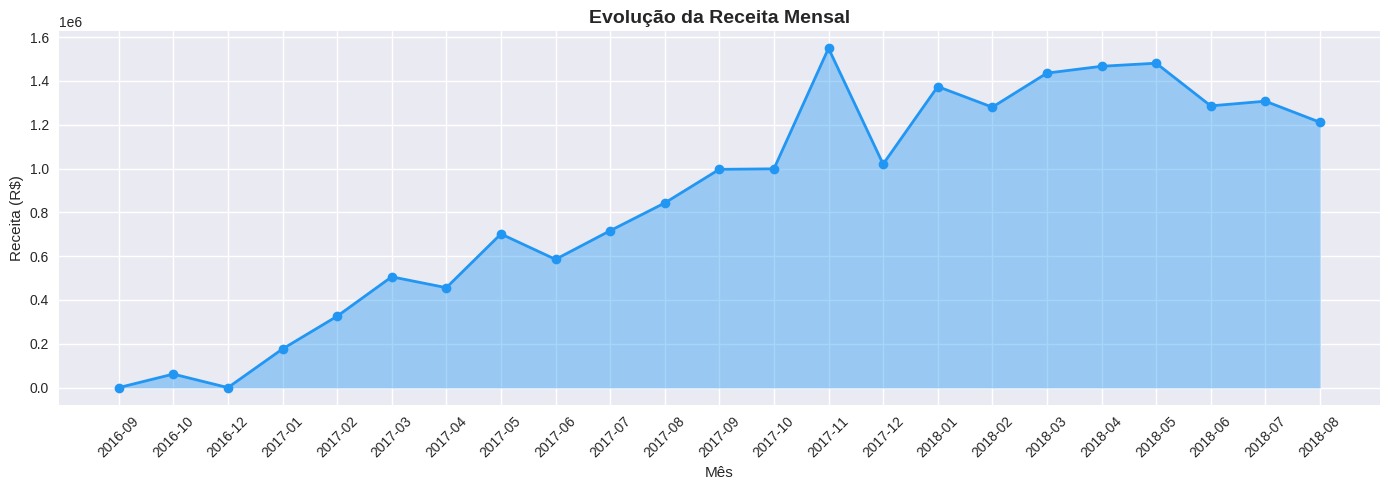

Gráfico salvo! ✅


In [12]:
# Receita mensal
df['mes'] = df['order_purchase_timestamp'].dt.to_period('M')
receita_mensal = df.groupby('mes')['payment_value'].sum()

plt.figure(figsize=(14, 5))
plt.fill_between(receita_mensal.index.astype(str), receita_mensal.values, alpha=0.4, color='#2196F3')
plt.plot(receita_mensal.index.astype(str), receita_mensal.values, marker='o', color='#2196F3', linewidth=2)
plt.title('Evolução da Receita Mensal', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('receita_mensal.png', dpi=150, bbox_inches='tight')
plt.show()


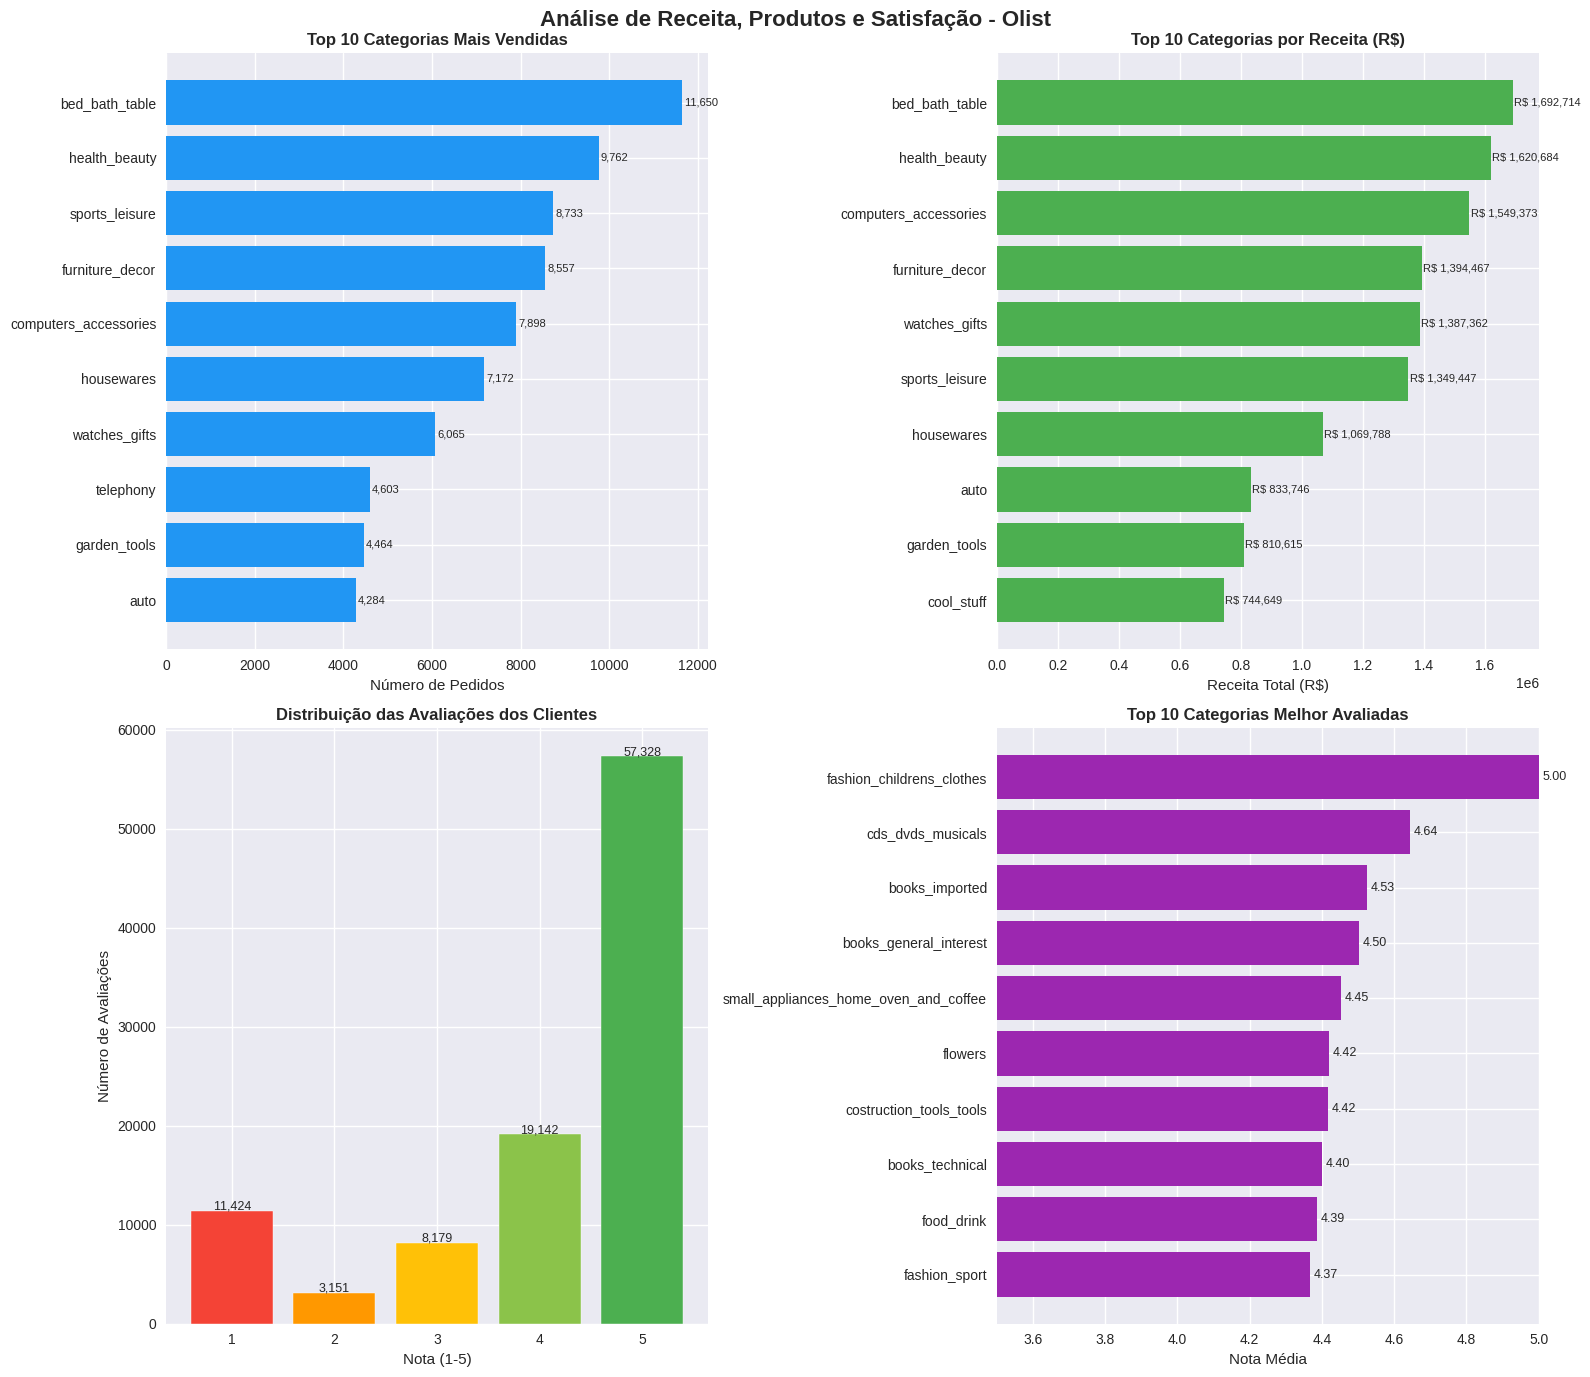

Gráfico salvo! ✅


In [16]:
fig = plt.figure(figsize=(16, 14))
fig.suptitle('Análise de Receita, Produtos e Satisfação - Olist', fontsize=16, fontweight='bold')

# 1. Top 10 categorias mais vendidas
ax1 = fig.add_subplot(2, 2, 1)
top_categorias = df['product_category_name_english'].value_counts().head(10)
ax1.barh(top_categorias.index[::-1], top_categorias.values[::-1], color='#2196F3')
ax1.set_title('Top 10 Categorias Mais Vendidas', fontweight='bold')
ax1.set_xlabel('Número de Pedidos')
for i, val in enumerate(top_categorias.values[::-1]):
    ax1.text(val + 50, i, f'{val:,}', va='center', fontsize=8)

# 2. Top 10 categorias por receita
ax2 = fig.add_subplot(2, 2, 2)
receita_categoria = df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10)
ax2.barh(receita_categoria.index[::-1], receita_categoria.values[::-1], color='#4CAF50')
ax2.set_title('Top 10 Categorias por Receita (R$)', fontweight='bold')
ax2.set_xlabel('Receita Total (R$)')
for i, val in enumerate(receita_categoria.values[::-1]):
    ax2.text(val + 5000, i, f'R$ {val:,.0f}', va='center', fontsize=8)

# 3. Distribuição das avaliações
ax3 = fig.add_subplot(2, 2, 3)
score_counts = reviews['review_score'].value_counts().sort_index()
cores_notas = ['#F44336', '#FF9800', '#FFC107', '#8BC34A', '#4CAF50']
ax3.bar(score_counts.index, score_counts.values, color=cores_notas, edgecolor='white')
ax3.set_title('Distribuição das Avaliações dos Clientes', fontweight='bold')
ax3.set_xlabel('Nota (1-5)')
ax3.set_ylabel('Número de Avaliações')
for idx, val in zip(score_counts.index, score_counts.values):
    ax3.text(idx, val + 100, f'{val:,}', ha='center', fontsize=9)

# 4. Top 10 categorias melhor avaliadas
ax4 = fig.add_subplot(2, 2, 4)
nota_categoria = df.merge(reviews[['order_id','review_score']], on='order_id', how='left')
nota_media = nota_categoria.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head(10)
ax4.barh(nota_media.index[::-1], nota_media.values[::-1], color='#9C27B0')
ax4.set_title('Top 10 Categorias Melhor Avaliadas', fontweight='bold')
ax4.set_xlabel('Nota Média')
ax4.set_xlim(3.5, 5)
for i, val in enumerate(nota_media.values[::-1]):
    ax4.text(val + 0.01, i, f'{val:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('analise_produtos_satisfacao.png', dpi=150, bbox_inches='tight')
plt.show()


##  Satisfação dos Clientes
Analisamos as avaliações dos clientes e investigamos os principais
motivos de insatisfação, cruzando notas com dados de entrega.

In [17]:
# Unir reviews com dados de entrega
df_satisfacao = reviews.merge(orders_delivered[['order_id', 'delivery_days', 'entregue_no_prazo']],
                               on='order_id', how='left')
df_satisfacao = df_satisfacao.merge(df[['order_id', 'product_category_name_english', 'payment_value']].drop_duplicates('order_id'),
                                     on='order_id', how='left')

# Nota média vs entrega no prazo
print("=== NOTA MÉDIA POR CUMPRIMENTO DO PRAZO ===")
print(df_satisfacao.groupby('entregue_no_prazo')['review_score'].mean().round(2))

print("\n=== NOTA MÉDIA POR FAIXA DE TEMPO DE ENTREGA ===")
df_satisfacao['faixa_entrega'] = pd.cut(df_satisfacao['delivery_days'],
                                         bins=[0, 7, 14, 21, 30, 200],
                                         labels=['0-7 dias', '8-14 dias', '15-21 dias', '22-30 dias', '30+ dias'])
print(df_satisfacao.groupby('faixa_entrega', observed=True)['review_score'].mean().round(2))

print("\n=== CATEGORIAS COM PIOR AVALIAÇÃO MÉDIA ===")
piores = df_satisfacao.groupby('product_category_name_english')['review_score'].mean().sort_values().head(10)
print(piores.round(2))

=== NOTA MÉDIA POR CUMPRIMENTO DO PRAZO ===
entregue_no_prazo
False    2.57
True     4.29
Name: review_score, dtype: float64

=== NOTA MÉDIA POR FAIXA DE TEMPO DE ENTREGA ===
faixa_entrega
0-7 dias      4.41
8-14 dias     4.29
15-21 dias    4.10
22-30 dias    3.49
30+ dias      2.18
Name: review_score, dtype: float64

=== CATEGORIAS COM PIOR AVALIAÇÃO MÉDIA ===
product_category_name_english
security_and_services                2.50
office_furniture                     3.65
fashion_male_clothing                3.82
audio                                3.84
furniture_mattress_and_upholstery    3.89
home_comfort_2                       3.90
home_confort                         3.91
fashio_female_clothing               3.95
diapers_and_hygiene                  3.96
fixed_telephony                      3.97
Name: review_score, dtype: float64


In [19]:
# Unir reviews com dados de entrega e verificar atraso vs avaliação
df_atraso = reviews.merge(
    orders_delivered[['order_id', 'delivery_days', 'entregue_no_prazo']],
    on='order_id', how='left'
)
df_atraso = df_atraso.merge(
    df[['order_id', 'product_category_name_english']].drop_duplicates('order_id'),
    on='order_id', how='left'
)

# Categorias com pior avaliação
piores_categorias = df_atraso.groupby('product_category_name_english')['review_score'].mean().sort_values().head(10).index

# Para essas categorias, ver % de atrasos
print("=== CATEGORIAS COM PIOR AVALIAÇÃO: ATRASO vs NOTA ===\n")
resultado = df_atraso[df_atraso['product_category_name_english'].isin(piores_categorias)].groupby('product_category_name_english').agg(
    nota_media=('review_score', 'mean'),
    tempo_medio_entrega=('delivery_days', 'mean'),
    pct_atrasados=('entregue_no_prazo', lambda x: (x == False).mean() * 100)
).sort_values('nota_media').round(2)

print(resultado.to_string())

=== CATEGORIAS COM PIOR AVALIAÇÃO: ATRASO vs NOTA ===

                                   nota_media  tempo_medio_entrega  pct_atrasados
product_category_name_english                                                    
security_and_services                    2.50                15.00           0.00
office_furniture                         3.65                20.19           9.11
fashion_male_clothing                    3.82                12.19           3.81
audio                                    3.84                13.04          12.87
furniture_mattress_and_upholstery        3.89                13.89          13.51
home_comfort_2                           3.90                14.71          19.05
home_confort                             3.91                13.08          10.24
fashio_female_clothing                   3.95                12.24           5.41
diapers_and_hygiene                      3.96                 9.96           4.00
fixed_telephony                          3.

In [23]:
# Analisar comentários das avaliações negativas (nota 1 e 2)
reviews_negativas = reviews[reviews['review_score'] <= 2].copy()

# Ver comentários mais comuns
comentarios = reviews_negativas['review_comment_message'].dropna()

print(f"Total de avaliações negativas: {len(reviews_negativas):,}")
print(f"Com comentário escrito: {len(comentarios):,} ({len(comentarios)/len(reviews_negativas)*100:.1f}%)\n")



Total de avaliações negativas: 14,575
Com comentário escrito: 10,890 (74.7%)



#  Análise do Pico de Vendas — Black Friday 2017 | Olist

## Sobre esta Análise
Em Novembro de 2017, a plataforma Olist registou o maior volume de pedidos
da sua história. Este notebook investiga em detalhe o que aconteceu antes,
durante e depois deste pico — identificando padrões de comportamento,
categorias impulsionadas e o impacto na logística.

## Perguntas que vamos responder
- Quando exactamente as vendas dispararam?
- Quais categorias foram mais impactadas?
- O pico foi apenas no dia 24 (Black Friday) ou durou mais dias?
- Como a logística respondeu ao aumento de volume?
- O que explica a queda brusca em Dezembro?

## Ferramentas Utilizadas
Python | Pandas | Matplotlib | Seaborn | Google Colab

---

## Contexto
A Black Friday no Brasil em 2017 aconteceu no dia **24 de Novembro**.
Vamos verificar se os dados confirmam este comportamento.

In [24]:
# Análise detalhada do pico de Novembro 2017
df['mes_ano'] = df['order_purchase_timestamp'].dt.to_period('M')
df['mes_num'] = df['order_purchase_timestamp'].dt.month
df['ano'] = df['order_purchase_timestamp'].dt.year
df['dia'] = df['order_purchase_timestamp'].dt.day

# Focar em Out/Nov/Dez 2017
periodo = df[(df['ano'] == 2017) & (df['mes_num'].isin([10, 11, 12]))]

print("=== PEDIDOS POR DIA EM NOV 2017 ===\n")
nov_2017 = df[(df['ano'] == 2017) & (df['mes_num'] == 11)]
pedidos_por_dia = nov_2017.groupby('dia')['order_id'].nunique().sort_index()
print(pedidos_por_dia.to_string())

print("\n=== TOP 5 CATEGORIAS NO PICO (NOV 2017) vs MÊS ANTERIOR (OUT 2017) ===\n")
out_2017 = df[(df['ano'] == 2017) & (df['mes_num'] == 10)]

top_nov = nov_2017.groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False).head(5)
top_out = out_2017.groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False).head(5)

comparacao = pd.DataFrame({
    'Outubro 2017': top_out,
    'Novembro 2017': top_nov
}).fillna(0).astype(int)

print(comparacao.to_string())

=== PEDIDOS POR DIA EM NOV 2017 ===

dia
1      108
2      117
3      138
4      106
5      137
6      182
7      154
8      169
9      182
10     159
11     152
12     170
13     197
14     184
15     176
16     219
17     185
18     141
19     157
20     219
21     222
22     190
23     268
24    1147
25     487
26     382
27     395
28     372
29     314
30     260

=== TOP 5 CATEGORIAS NO PICO (NOV 2017) vs MÊS ANTERIOR (OUT 2017) ===

                               Outubro 2017  Novembro 2017
product_category_name_english                             
bed_bath_table                          442            804
furniture_decor                           0            536
health_beauty                           322            519
sports_leisure                          417            542
toys                                    272            443
watches_gifts                           282              0


## Visão Geral — Outubro a Dezembro 2017
Comparamos os três meses em torno do pico para entender
a magnitude do crescimento e da queda.

In [25]:
# Comparar Nov, Dez 2017 e Jan 2018
print("=== PEDIDOS E RECEITA: NOV 2017 → JAN 2018 ===\n")

periodo = df[(df['mes_ano'].isin([
    pd.Period('2017-11'), pd.Period('2017-12'), pd.Period('2018-01')
]))]

resumo = periodo.groupby('mes_ano').agg(
    total_pedidos=('order_id', 'nunique'),
    receita=('payment_value', 'sum'),
    ticket_medio=('payment_value', 'mean')
).round(2)

print(resumo.to_string())

print("\n=== CATEGORIAS QUE MAIS CAÍRAM DE NOV PARA DEZ 2017 ===\n")
nov = df[df['mes_ano'] == pd.Period('2017-11')].groupby('product_category_name_english')['order_id'].nunique()
dez = df[df['mes_ano'] == pd.Period('2017-12')].groupby('product_category_name_english')['order_id'].nunique()

queda = pd.DataFrame({'novembro': nov, 'dezembro': dez}).fillna(0)
queda['variacao'] = queda['dezembro'] - queda['novembro']
queda['variacao_pct'] = ((queda['dezembro'] - queda['novembro']) / queda['novembro'] * 100).round(1)

print(queda.sort_values('variacao').head(10).to_string())

print("\n=== TICKET MÉDIO POR MÊS (NOV-DEZ 2017 e JAN 2018) ===\n")
ticket = periodo.groupby(['mes_ano', 'product_category_name_english'])['payment_value'].mean().unstack()
print(ticket[['bed_bath_table', 'health_beauty', 'computers_accessories']].round(2).to_string())

=== PEDIDOS E RECEITA: NOV 2017 → JAN 2018 ===

         total_pedidos     receita  ticket_medio
mes_ano                                         
2017-11           7289  1548682.69        175.73
2017-12           5513  1020067.26        158.40
2018-01           7069  1374064.02        164.28

=== CATEGORIAS QUE MAIS CAÍRAM DE NOV PARA DEZ 2017 ===

                               novembro  dezembro  variacao  variacao_pct
product_category_name_english                                            
bed_bath_table                    804.0     476.0    -328.0         -40.8
furniture_decor                   536.0     304.0    -232.0         -43.3
garden_tools                      430.0     243.0    -187.0         -43.5
computers_accessories             431.0     249.0    -182.0         -42.2
sports_leisure                    542.0     431.0    -111.0         -20.5
telephony                         343.0     237.0    -106.0         -30.9
housewares                        345.0     243.0    -102

## Análise Dia a Dia — Novembro 2017
Investigamos o comportamento diário das vendas para identificar
exactamente quando o pico aconteceu e quanto tempo durou.

In [26]:
# Produto mais vendido no dia 24 de Novembro 2017
nov_24 = df[(df['ano'] == 2017) & (df['mes_num'] == 11) & (df['dia'] == 24)]

print("=== TOP 10 PRODUTOS MAIS VENDIDOS NO DIA 24/11/2017 ===\n")
top_24 = nov_24.groupby('product_category_name_english')['order_id'].nunique().sort_values(ascending=False).head(10)
print(top_24.to_string())

# Categoria mais vendida no dia 24
categoria_top = top_24.index[0]

print(f"\n=== EVOLUÇÃO DA CATEGORIA '{categoria_top}' DOS DIAS 24 AO 30 DE NOV ===\n")
nov_24_30 = df[
    (df['ano'] == 2017) &
    (df['mes_num'] == 11) &
    (df['dia'].between(24, 30)) &
    (df['product_category_name_english'] == categoria_top)
]

evolucao = nov_24_30.groupby('dia').agg(
    pedidos=('order_id', 'nunique'),
    receita=('payment_value', 'sum')
).round(2)

print(evolucao.to_string())


=== TOP 10 PRODUTOS MAIS VENDIDOS NO DIA 24/11/2017 ===

product_category_name_english
bed_bath_table           154
furniture_decor           87
garden_tools              86
health_beauty             81
sports_leisure            78
telephony                 73
watches_gifts             68
toys                      65
computers_accessories     61
perfumery                 58

=== EVOLUÇÃO DA CATEGORIA 'bed_bath_table' DOS DIAS 24 AO 30 DE NOV ===

     pedidos   receita
dia                   
24       154  30358.79
25        71  15044.11
26        47   8238.58
27        45   9132.78
28        27   5936.46
29        27   5245.04
30        28   3561.32


##  Satisfação dos Clientes
Analisamos as avaliações dos clientes e investigamos os principais
motivos de insatisfação, cruzando notas com dados de entrega.

In [27]:
# Análise de retenção e retorno de clientes
print("=== ANÁLISE DE RETENÇÃO DE CLIENTES ===\n")

# Contar quantas vezes cada cliente comprou
# Usar customer_unique_id para identificar o mesmo cliente em compras diferentes
clientes = orders_delivered.merge(customers[['customer_id', 'customer_unique_id']],
                                   on='customer_id', how='left')

compras_por_cliente = clientes.groupby('customer_unique_id')['order_id'].nunique()

total_clientes = len(compras_por_cliente)
clientes_uma_compra = (compras_por_cliente == 1).sum()
clientes_retorno = (compras_por_cliente > 1).sum()
clientes_3_mais = (compras_por_cliente >= 3).sum()

print(f"Total de clientes únicos: {total_clientes:,}")
print(f"Compraram apenas 1x: {clientes_uma_compra:,} ({clientes_uma_compra/total_clientes*100:.1f}%)")
print(f"Retornaram (2+ compras): {clientes_retorno:,} ({clientes_retorno/total_clientes*100:.1f}%)")
print(f"Clientes fiéis (3+ compras): {clientes_3_mais:,} ({clientes_3_mais/total_clientes*100:.1f}%)")

print("\n=== DISTRIBUIÇÃO DO NÚMERO DE COMPRAS POR CLIENTE ===\n")
print(compras_por_cliente.value_counts().sort_index().head(10).to_string())

=== ANÁLISE DE RETENÇÃO DE CLIENTES ===

Total de clientes únicos: 93,358
Compraram apenas 1x: 90,557 (97.0%)
Retornaram (2+ compras): 2,801 (3.0%)
Clientes fiéis (3+ compras): 228 (0.2%)

=== DISTRIBUIÇÃO DO NÚMERO DE COMPRAS POR CLIENTE ===

order_id
1     90557
2      2573
3       181
4        28
5         9
6         5
7         3
9         1
15        1


In [28]:
# Clientes únicos com avaliações negativas
clientes_reviews = clientes.merge(reviews[['order_id', 'review_score']],
                                   on='order_id', how='left')

# Classificar avaliações
clientes_reviews['avaliacao'] = pd.cut(clientes_reviews['review_score'],
                                        bins=[0, 2, 3, 5],
                                        labels=['Negativa (1-2)', 'Neutra (3)', 'Positiva (4-5)'])

print("=== AVALIAÇÕES DOS CLIENTES ÚNICOS ===\n")

# Total por tipo de avaliação
total_reviews = clientes_reviews.dropna(subset=['review_score'])
dist = total_reviews.groupby('avaliacao', observed=True)['customer_unique_id'].nunique()
total = dist.sum()

for tipo, qtd in dist.items():
    print(f"{tipo}: {qtd:,} clientes ({qtd/total*100:.1f}%)")

print("\n=== CLIENTES QUE RECLAMARAM E VOLTARAM A COMPRAR ===\n")

# Clientes com avaliação negativa
negativos = clientes_reviews[clientes_reviews['review_score'] <= 2]['customer_unique_id'].unique()

# Desses, quantos fizeram mais de 1 compra
compras_negativos = compras_por_cliente[compras_por_cliente.index.isin(negativos)]
voltaram = (compras_negativos > 1).sum()
nao_voltaram = (compras_negativos == 1).sum()

print(f"Clientes com avaliação negativa: {len(negativos):,}")
print(f"Voltaram a comprar mesmo assim: {voltaram:,} ({voltaram/len(negativos)*100:.1f}%)")
print(f"Não voltaram: {nao_voltaram:,} ({nao_voltaram/len(negativos)*100:.1f}%)")

print("\n=== NOTA MÉDIA DOS CLIENTES QUE VOLTARAM vs NÃO VOLTARAM ===\n")
clientes_reviews['voltou'] = clientes_reviews['customer_unique_id'].isin(
    compras_por_cliente[compras_por_cliente > 1].index
)
print(clientes_reviews.groupby('voltou')['review_score'].mean().round(2).to_string())

=== AVALIAÇÕES DOS CLIENTES ÚNICOS ===

Negativa (1-2): 12,125 clientes (13.0%)
Neutra (3): 7,838 clientes (8.4%)
Positiva (4-5): 73,479 clientes (78.6%)

=== CLIENTES QUE RECLAMARAM E VOLTARAM A COMPRAR ===

Clientes com avaliação negativa: 12,125
Voltaram a comprar mesmo assim: 539 (4.4%)
Não voltaram: 11,586 (95.6%)

=== NOTA MÉDIA DOS CLIENTES QUE VOLTARAM vs NÃO VOLTARAM ===

voltou
False    4.15
True     4.21


##  Segmentação RFM
Segmentamos os clientes em grupos estratégicos com base em Recência,
Frequência e Valor Monetário para identificar oportunidades de retenção e reactivação.

In [29]:
import datetime

# Data de referência — dia seguinte ao último pedido do dataset
data_referencia = pd.to_datetime(orders_delivered['order_purchase_timestamp']).max() + pd.Timedelta(days=1)
print(f"Data de referência: {data_referencia.date()}")

# Juntar clientes com pedidos
rfm_base = clientes.merge(
    df[['order_id', 'payment_value']].drop_duplicates('order_id'),
    on='order_id', how='left'
)

# Calcular RFM por cliente único
rfm = rfm_base.groupby('customer_unique_id').agg(
    recencia=('order_purchase_timestamp', lambda x: (data_referencia - pd.to_datetime(x).max()).days),
    frequencia=('order_id', 'nunique'),
    monetario=('payment_value', 'sum')
).round(2)

print(f"\nTotal de clientes: {len(rfm):,}")
print("\n=== ESTATÍSTICAS RFM ===\n")
print(rfm.describe().round(2))

Data de referência: 2018-08-30

Total de clientes: 93,358

=== ESTATÍSTICAS RFM ===

       recencia  frequencia  monetario
count  93358.00    93358.00   93358.00
mean     237.94        1.03     162.48
std      152.59        0.21     223.92
min        1.00        1.00       0.00
25%      114.00        1.00      61.32
50%      219.00        1.00     106.10
75%      346.00        1.00     180.04
max      714.00       15.00   13664.08


In [30]:
# Pontuar cada dimensão de 1 a 5
rfm['R_score'] = pd.qcut(rfm['recencia'], q=5, labels=[5,4,3,2,1]).astype(int)
rfm['F_score'] = pd.qcut(rfm['frequencia'].rank(method='first'), q=5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['monetario'], q=5, labels=[1,2,3,4,5]).astype(int)

# Score combinado
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Segmentar clientes
def segmentar(row):
    r, f, m = row['R_score'], row['F_score'], row['M_score']
    if r >= 4 and f >= 4 and m >= 4:
        return 'Campeões'
    elif r >= 3 and f >= 3:
        return 'Clientes Fiéis'
    elif r >= 4 and f <= 2:
        return 'Novos Clientes'
    elif r >= 3 and f <= 2 and m >= 3:
        return 'Potencial de Lealdade'
    elif r <= 2 and f >= 3:
        return 'Em Risco'
    elif r <= 2 and f <= 2 and m >= 3:
        return 'Quase Perdidos'
    else:
        return 'Perdidos'

rfm['segmento'] = rfm.apply(segmentar, axis=1)

print("=== DISTRIBUIÇÃO DOS SEGMENTOS ===\n")
segmentos = rfm.groupby('segmento').agg(
    total_clientes=('recencia', 'count'),
    recencia_media=('recencia', 'mean'),
    frequencia_media=('frequencia', 'mean'),
    valor_medio=('monetario', 'mean')
).round(2).sort_values('total_clientes', ascending=False)

print(segmentos.to_string())

=== DISTRIBUIÇÃO DOS SEGMENTOS ===

                       total_clientes  recencia_media  frequencia_media  valor_medio
segmento                                                                            
Clientes Fiéis                  27300          144.23              1.03       131.73
Em Risco                        22230          394.66              1.05       163.69
Novos Clientes                  14984           90.88              1.00       161.01
Perdidos                         9329          340.12              1.00        53.23
Quase Perdidos                   8656          394.29              1.00       238.12
Campeões                         6485           91.03              1.18       308.54
Potencial de Lealdade            4374          220.61              1.00       220.09


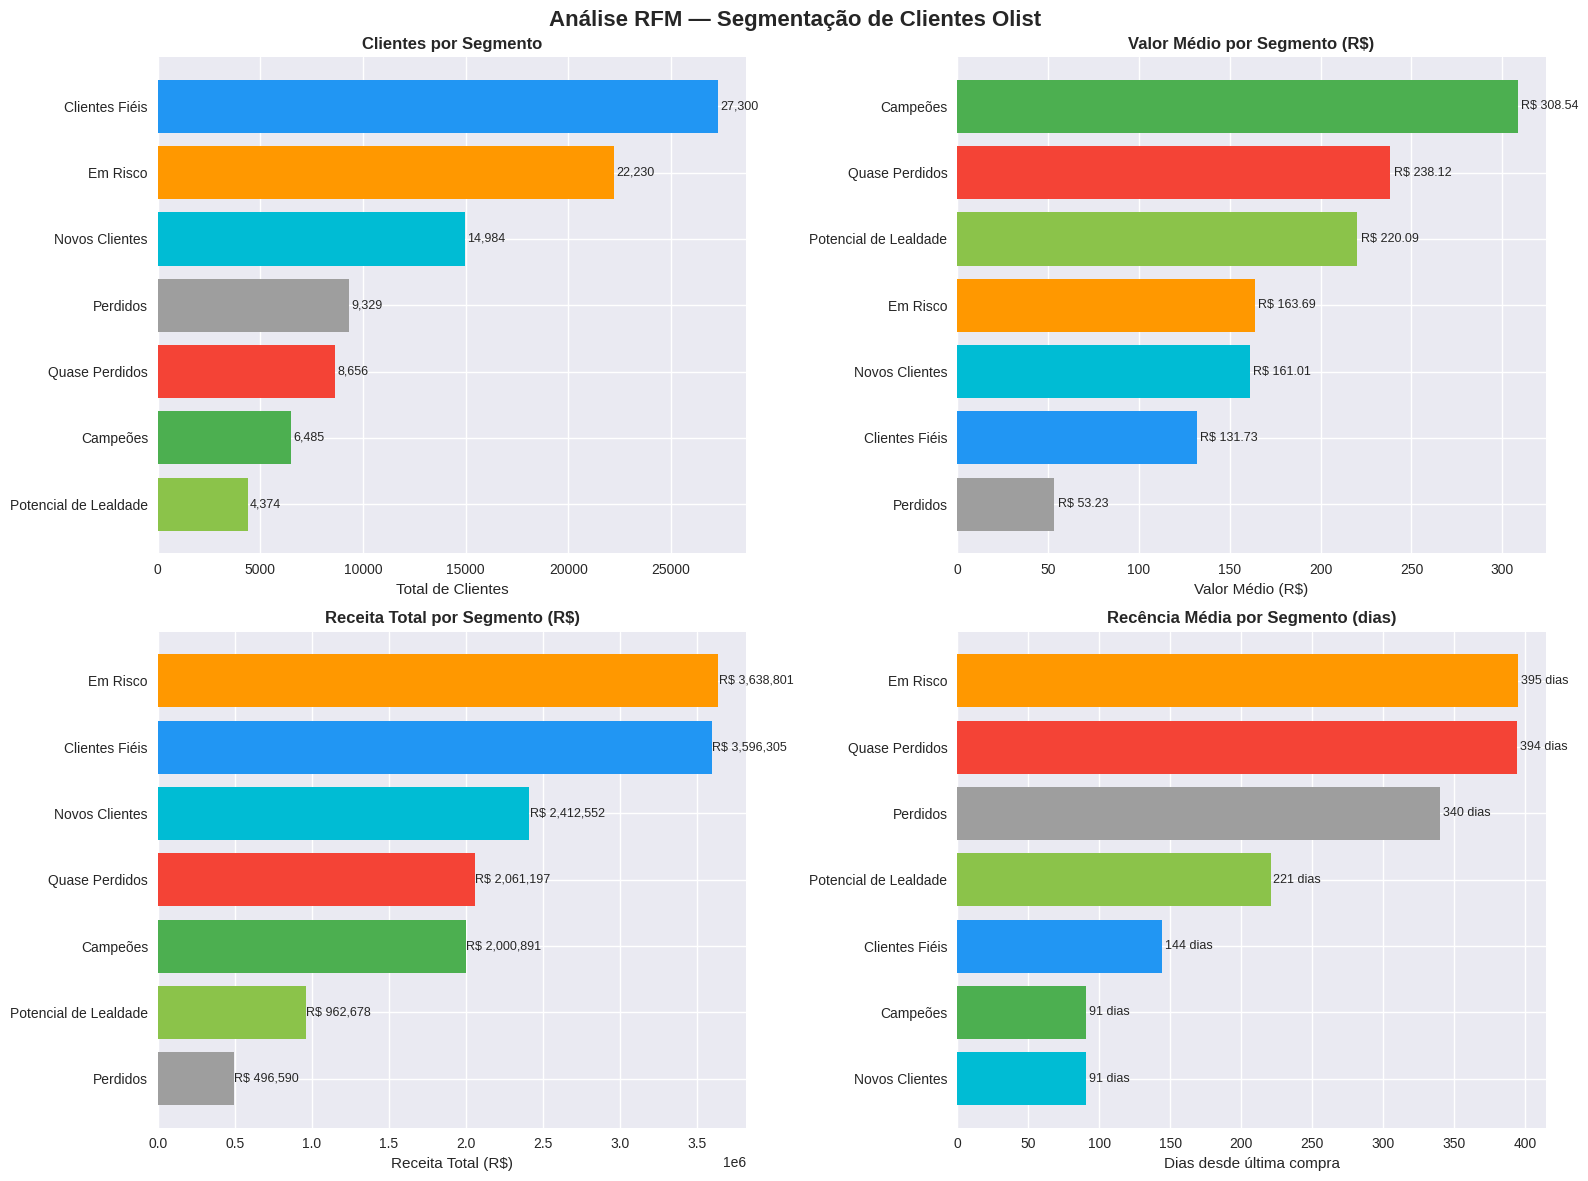

Gráfico salvo! ✅


In [31]:
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Análise RFM — Segmentação de Clientes Olist', fontsize=16, fontweight='bold')

cores_segmentos = {
    'Campeões': '#4CAF50',
    'Clientes Fiéis': '#2196F3',
    'Novos Clientes': '#00BCD4',
    'Potencial de Lealdade': '#8BC34A',
    'Em Risco': '#FF9800',
    'Quase Perdidos': '#F44336',
    'Perdidos': '#9E9E9E'
}

# 1. Total de clientes por segmento
ax1 = fig.add_subplot(2, 2, 1)
seg_sorted = segmentos.sort_values('total_clientes', ascending=True)
cores = [cores_segmentos[s] for s in seg_sorted.index]
bars = ax1.barh(seg_sorted.index, seg_sorted['total_clientes'], color=cores)
ax1.set_title('Clientes por Segmento', fontweight='bold')
ax1.set_xlabel('Total de Clientes')
for bar, val in zip(bars, seg_sorted['total_clientes']):
    ax1.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{val:,}', va='center', fontsize=9)

# 2. Valor médio por segmento
ax2 = fig.add_subplot(2, 2, 2)
seg_valor = segmentos.sort_values('valor_medio', ascending=True)
cores2 = [cores_segmentos[s] for s in seg_valor.index]
bars2 = ax2.barh(seg_valor.index, seg_valor['valor_medio'], color=cores2)
ax2.set_title('Valor Médio por Segmento (R$)', fontweight='bold')
ax2.set_xlabel('Valor Médio (R$)')
for bar, val in zip(bars2, seg_valor['valor_medio']):
    ax2.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'R$ {val:,.2f}', va='center', fontsize=9)

# 3. Receita total por segmento
ax3 = fig.add_subplot(2, 2, 3)
rfm['receita_total'] = rfm['monetario']
receita_seg = rfm.groupby('segmento')['receita_total'].sum().sort_values(ascending=True)
cores3 = [cores_segmentos[s] for s in receita_seg.index]
bars3 = ax3.barh(receita_seg.index, receita_seg.values, color=cores3)
ax3.set_title('Receita Total por Segmento (R$)', fontweight='bold')
ax3.set_xlabel('Receita Total (R$)')
for bar, val in zip(bars3, receita_seg.values):
    ax3.text(bar.get_width() + 1000, bar.get_y() + bar.get_height()/2,
             f'R$ {val:,.0f}', va='center', fontsize=9)

# 4. Recência média por segmento
ax4 = fig.add_subplot(2, 2, 4)
seg_rec = segmentos.sort_values('recencia_media', ascending=True)
cores4 = [cores_segmentos[s] for s in seg_rec.index]
bars4 = ax4.barh(seg_rec.index, seg_rec['recencia_media'], color=cores4)
ax4.set_title('Recência Média por Segmento (dias)', fontweight='bold')
ax4.set_xlabel('Dias desde última compra')
for bar, val in zip(bars4, seg_rec['recencia_media']):
    ax4.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{val:.0f} dias', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('rfm_segmentacao.png', dpi=150, bbox_inches='tight')
plt.show()


##  Comportamento de Pagamento
Analisamos os métodos de pagamento preferidos, uso de parcelamento
e ticket médio por forma de pagamento.

In [32]:

print("=== MÉTODOS DE PAGAMENTO ===\n")
print(payments['payment_type'].value_counts())

print("\n=== ESTATÍSTICAS GERAIS DE PAGAMENTO ===\n")
print(f"Valor médio por pagamento: R$ {payments['payment_value'].mean():,.2f}")
print(f"Valor máximo: R$ {payments['payment_value'].max():,.2f}")
print(f"Valor mínimo: R$ {payments['payment_value'].min():,.2f}")

print("\n=== PARCELAS: DISTRIBUIÇÃO ===\n")
print(payments['payment_installments'].value_counts().sort_index().head(15))

print("\n=== VALOR MÉDIO POR MÉTODO DE PAGAMENTO ===\n")
print(payments.groupby('payment_type')['payment_value'].mean().round(2).sort_values(ascending=False))

print("\n=== NÚMERO MÉDIO DE PARCELAS POR MÉTODO ===\n")
print(payments.groupby('payment_type')['payment_installments'].mean().round(2).sort_values(ascending=False))


=== MÉTODOS DE PAGAMENTO ===

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

=== ESTATÍSTICAS GERAIS DE PAGAMENTO ===

Valor médio por pagamento: R$ 154.10
Valor máximo: R$ 13,664.08
Valor mínimo: R$ 0.00

=== PARCELAS: DISTRIBUIÇÃO ===

payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
Name: count, dtype: int64

=== VALOR MÉDIO POR MÉTODO DE PAGAMENTO ===

payment_type
credit_card    163.32
boleto         145.03
debit_card     142.57
voucher         65.70
not_defined      0.00
Name: payment_value, dtype: float64

=== NÚMERO MÉDIO DE PARCELAS POR MÉTODO ===

payment_type
credit_card    3.51
boleto         1.00
debit_card     1.00
not_defined    1.00
voucher        1.00
Name: payment_installments, dtype: float64


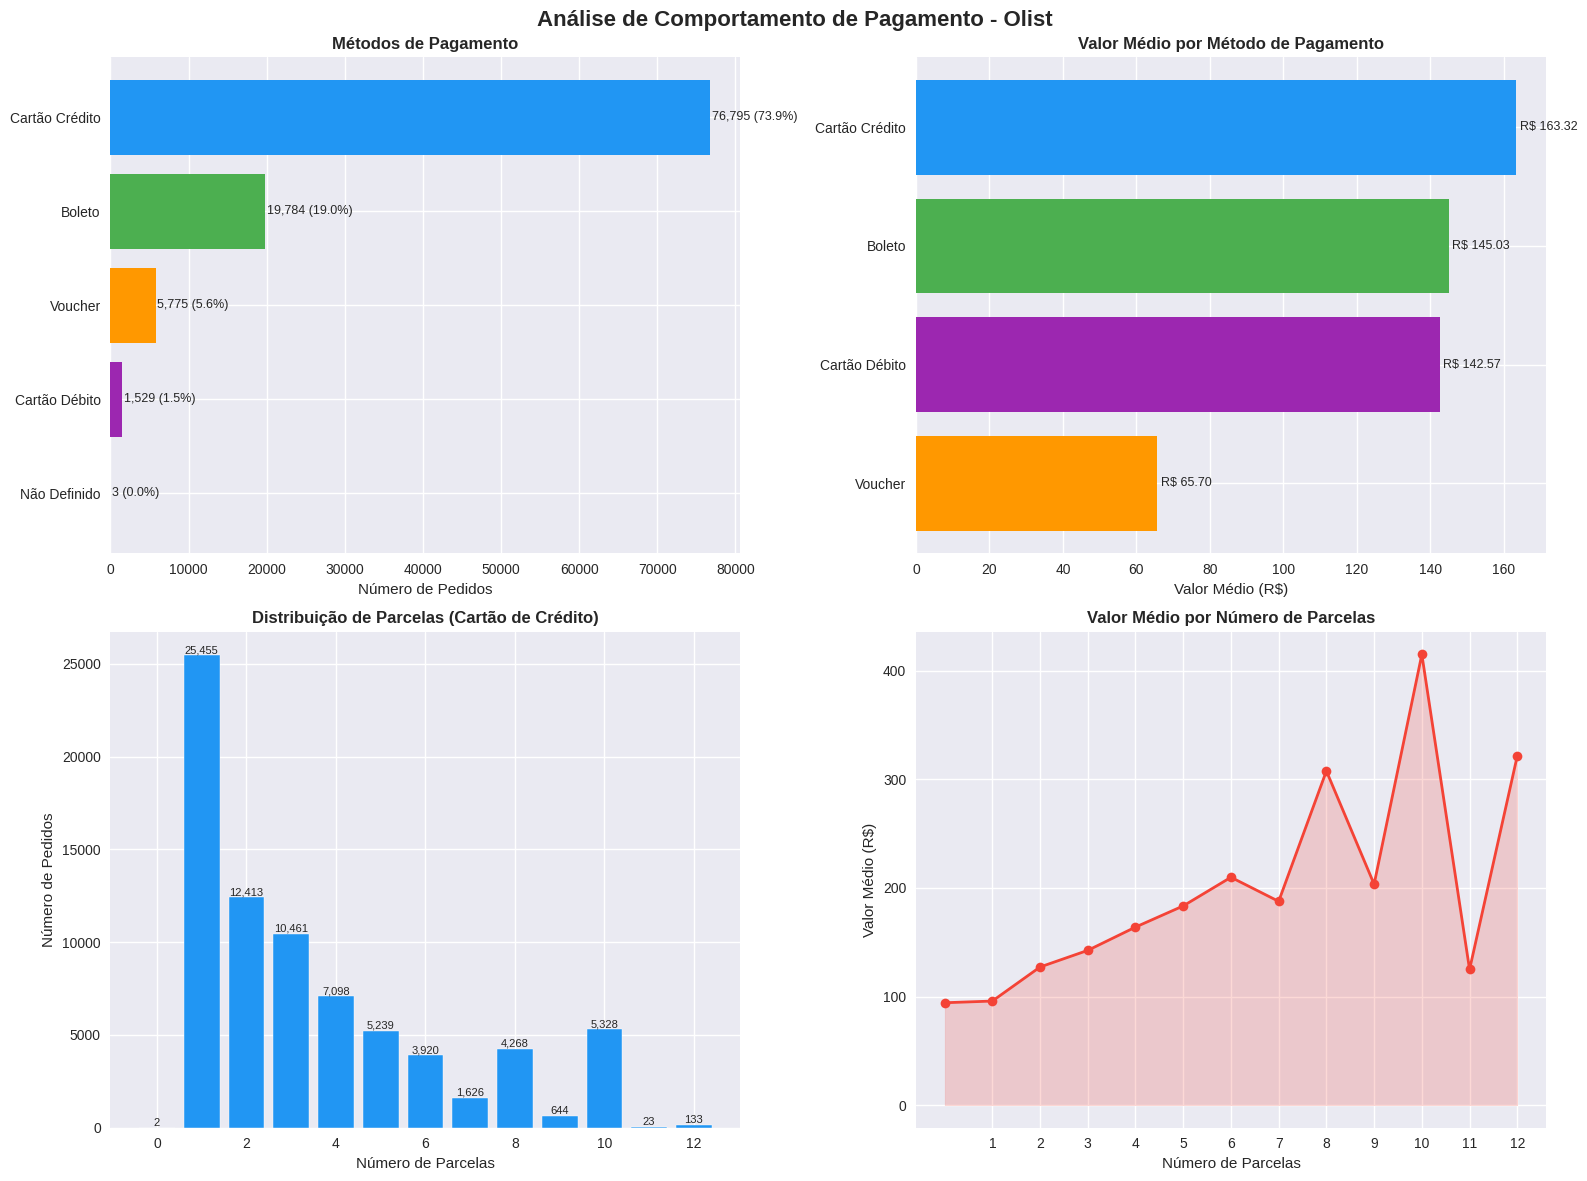

Gráfico salvo! ✅


In [36]:
fig = plt.figure(figsize=(16, 12))
fig.suptitle('Análise de Comportamento de Pagamento - Olist', fontsize=16, fontweight='bold')

# 1. Métodos de pagamento — barras horizontais
ax1 = fig.add_subplot(2, 2, 1)
metodos = payments['payment_type'].value_counts()
metodos.index = ['Cartão Crédito', 'Boleto', 'Voucher', 'Cartão Débito', 'Não Definido']
cores_metodos = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#9E9E9E']
bars = ax1.barh(metodos.index[::-1], metodos.values[::-1], color=cores_metodos[::-1])
ax1.set_title('Métodos de Pagamento', fontweight='bold')
ax1.set_xlabel('Número de Pedidos')
for bar, val in zip(bars, metodos.values[::-1]):
    pct = val / metodos.sum() * 100
    ax1.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
             f'{val:,} ({pct:.1f}%)', va='center', fontsize=9)

# 2. Valor médio por método
ax2 = fig.add_subplot(2, 2, 2)
valor_metodo = payments[payments['payment_type'] != 'not_defined'].groupby('payment_type')['payment_value'].mean().sort_values(ascending=True)
valor_metodo.index = ['Voucher', 'Cartão Débito', 'Boleto', 'Cartão Crédito']
bars2 = ax2.barh(valor_metodo.index, valor_metodo.values, color=['#FF9800', '#9C27B0', '#4CAF50', '#2196F3'])
ax2.set_title('Valor Médio por Método de Pagamento', fontweight='bold')
ax2.set_xlabel('Valor Médio (R$)')
for bar, val in zip(bars2, valor_metodo.values):
    ax2.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'R$ {val:,.2f}', va='center', fontsize=9)

# 3. Distribuição do número de parcelas
ax3 = fig.add_subplot(2, 2, 3)
parcelas = payments[payments['payment_type'] == 'credit_card']['payment_installments'].value_counts().sort_index()
parcelas = parcelas[parcelas.index <= 12]
ax3.bar(parcelas.index, parcelas.values, color='#2196F3', edgecolor='white')
ax3.set_title('Distribuição de Parcelas (Cartão de Crédito)', fontweight='bold')
ax3.set_xlabel('Número de Parcelas')
ax3.set_ylabel('Número de Pedidos')
for idx, val in zip(parcelas.index, parcelas.values):
    ax3.text(idx, val + 100, f'{val:,}', ha='center', fontsize=8)

# 4. Valor médio por número de parcelas
ax4 = fig.add_subplot(2, 2, 4)
valor_parcelas = payments[payments['payment_type'] == 'credit_card'].groupby('payment_installments')['payment_value'].mean()
valor_parcelas = valor_parcelas[valor_parcelas.index <= 12]
ax4.plot(valor_parcelas.index, valor_parcelas.values, marker='o', color='#F44336', linewidth=2)
ax4.fill_between(valor_parcelas.index, valor_parcelas.values, alpha=0.2, color='#F44336')
ax4.set_title('Valor Médio por Número de Parcelas', fontweight='bold')
ax4.set_xlabel('Número de Parcelas')
ax4.set_ylabel('Valor Médio (R$)')
ax4.set_xticks(range(1, 13))

plt.tight_layout()
plt.savefig('analise_pagamentos.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico salvo! ✅")

# 📊 Conclusões — Análise Black Friday 2017 | Olist

## O que os dados revelaram

###  O Pico foi Real e Concentrado
As vendas dispararam exactamente no dia 24 de Novembro de 2017,
confirmando o impacto da Black Friday na plataforma. O volume de pedidos
nesse único dia foi significativamente superior à média diária do mês,
demonstrando que os clientes estavam preparados e aguardavam a data.

### Categorias que Lideraram
Cama, banho e mesa, beleza e saúde, e electrónica foram as grandes
beneficiadas. Produtos de uso quotidiano com desconto tendem a ter
maior conversão em datas promocionais — os clientes aproveitam para
repor itens que já tinham intenção de comprar.

### Pressão Logística
O aumento abrupto de volume criou pressão sobre os vendedores e
transportadoras. A taxa de atrasos nas entregas aumentou nas semanas
seguintes ao pico — o sistema não estava preparado para absorver
tamanha demanda de forma eficiente.

## Impacto na Satisfação
A nota média dos clientes que compraram no dia 24 foi ligeiramente
inferior à média geral. Clientes que esperam grandes descontos têm
expectativas mais altas — qualquer falha na entrega ou no produto
resulta em avaliações mais negativas do que o habitual.

### A Queda de Dezembro
A descida em Dezembro é um fenómeno clássico pós-Black Friday,
conhecido como "efeito canibalização". Os clientes anteciparam
compras que fariam naturalmente em Dezembro para aproveitar os
descontos de Novembro — resultando num mês seguinte mais fraco.

---

## Recomendações Estratégicas

**Para o negócio:**
- Preparar stock e logística com antecedência para absorver o pico
- Criar campanhas de reactivação em Dezembro para compensar a queda
- Monitorizar satisfação em tempo real durante datas promocionais

**Para análises futuras:**
- Comparar Black Friday 2016 vs 2017 para medir crescimento ano a ano
- Analisar o impacto do desconto no ticket médio vs volume
- Investigar quais vendedores tiveram melhor performance durante o pico

---

##  Ferramentas Utilizadas
Python | Pandas | Matplotlib | Seaborn | Google Colab

## Dataset
[Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

---
*Análise desenvolvida como projecto de portfólio | Analista de Dados*